In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', None)
# read csv data from building and violations file.
def fetch_building_violations():
    df = pd.read_csv("../../data/tmpc1fh5mf6.csv", low_memory=False)
    return df


# read csv data: landlord assessment. Which contains the corelation between landlord and the building(address).
def fetch_landlord_assessment():
    df = pd.read_csv("../../data/fy2022pa-4.csv", low_memory=False)
    return df
    

In [10]:
def get_violation_by_building():
    vio_df = fetch_building_violations()

    # get violation address.
    vio_new_df = vio_df[['case_no', 'status_dttm', 'status', 'violation_sthigh', 'violation_street', 'violation_suffix',
                         'violation_stno', 'violation_city', 'violation_zip']]
    vio_new_df = vio_new_df.astype(object).replace(np.nan, '')

    # count the violation by house(address).
    vio_new_df['ST_NAME'] = vio_new_df['violation_stno'].astype(str) + " " + vio_new_df['violation_sthigh'].astype(str) + " " + vio_new_df['violation_street'].astype(
        str) + " " + vio_new_df['violation_suffix']
    vio_count_df = vio_new_df.groupby(['ST_NAME', 'violation_city', 'violation_zip'], as_index=False)['case_no'].size().reset_index().rename(columns={'index': 'violation_counts'})\
        .sort_values("violation_counts", ascending=False)
    # print(vio_count_df.columns)
    return vio_count_df

In [29]:
def get_violation_by_landlord():
    vio_df = get_violation_by_building()
    land_df = fetch_landlord_assessment()

    #get building's landlord info
    land_new_df = land_df[['PID', 'ST_NUM', 'ST_NAME', 'CITY', 'ZIPCODE', 'OWNER', 'MAIL_CITY']]
    land_new_df = land_new_df.astype(object).replace(np.nan, '')

    #count the violation by landlords
    land_new_df['ADDRESS'] = land_new_df['ST_NUM'].astype(str) + " " + land_new_df['ST_NAME']
    # print(land_new_df.head(10))
    vio_land_df = pd.merge(vio_df, land_new_df, how='left', left_on=['ST_NAME'], right_on=['ADDRESS'])
    violand_count_df = vio_land_df.groupby(['OWNER'], as_index=False)['PID'].size().reset_index().rename(columns={'index': 'violation_counts'}).sort_values("violation_counts", ascending=False)
    violations_city_df = vio_land_df.groupby(['MAIL_CITY'], as_index=False)['PID'].size().reset_index().rename(columns={'index': 'violation_counts'}).sort_values("violation_counts", ascending=False)
    plt.figure(figsize=[8, 4])
    plt.title('Landlords violation info')
    plt.subplot().bar(list(violand_count_df['OWNER'].unique()), violand_count_df['violation_counts'])
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=[8, 4])
    plt.title('City violation info')
    plt.subplot().bar(list(violations_city_df['MAIL_CITY']), violations_city_df['violation_counts'])
    plt.xticks(rotation=90)
    plt.show()
    
    

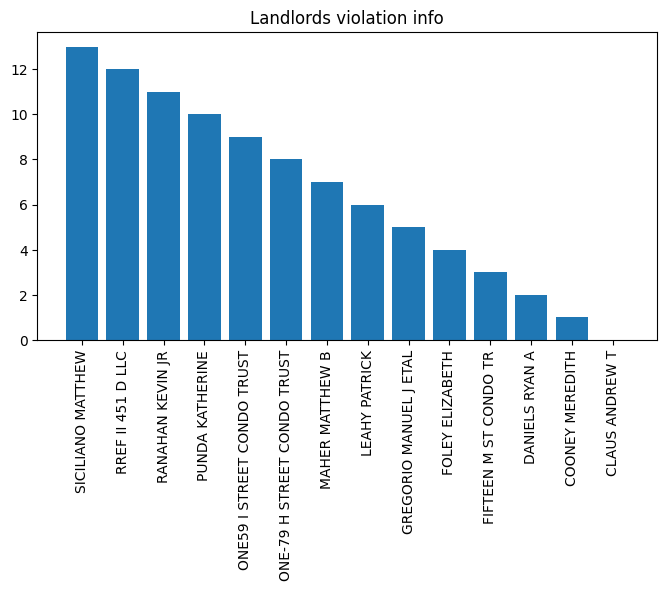

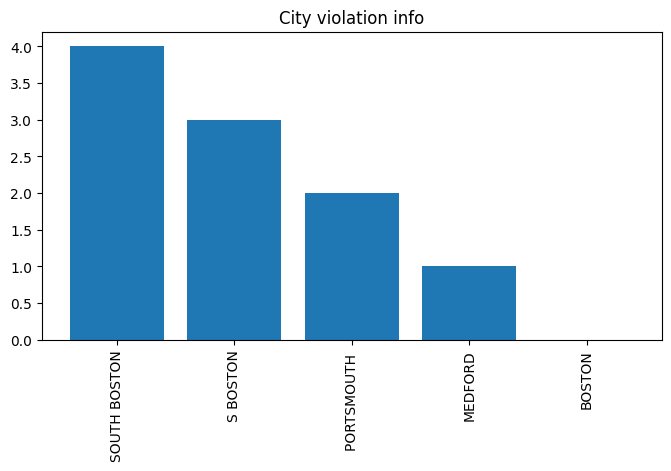

In [30]:
get_violation_by_landlord()


In [31]:
df_violation = get_violation_by_building()
df_violation.head(10)


,violation_counts,ST_NAME,violation_city,violation_zip,size
11191,11191,9R Winship ST,Boston,02135,1
11190,11190,9R Park ST,Dorchester,02122,1
11189,11189,9A Wordsworth ST,East Boston,02128,1
11188,11188,9A Ruthven ST,Dorchester,02121,1
11187,11187,995 Massachusetts AV,Roxbury,02119,2
11186,11186,995 Blue Hill AVE,Dorchester,02124,4
11185,11185,992 Dorchester AVE,Dorchester,02125,1
11184,11184,99 107 Broad ST,Boston,02110,1
11183,11183,99 101 Rockland ST,West Roxbury,02132,1
11182,11182,99 Woodrow AVE,Dorchester,02124,2


In [32]:
df_landlord = fetch_landlord_assessment()
df_landlord.head(10)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL_CITY,MAIL_STATE,MAIL_ZIPCODE,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,ROOF_COVER,INT_WALL,EXT_FINISHED,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIRE_PLACE,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,,100001000.0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.0,1,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,NaN,195 LEXINGTON ST,EAST BOSTON,MA,02128,3.0,NaN,0,0,0,1150.0,3353.00,2202.0,"179,500","539,900","719,400","$7,827.07",1900.0,NaN,R -,F - Flat,C - Composition,N - Normal,A - Asbestos,A - Average,F - Fair,A - Average,6,3,0,3,12,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,3,A - Average,NaN
1,100002000,,100002000.0,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,NaN,197 LEXINGTON ST,EAST BOSTON,MA,02128,3.0,NaN,0,0,0,1150.0,3299.00,2307.0,"180,300","564,500","744,800","$8,103.42",1920.0,2000.0,R -,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,3,3,0,3,9,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0,NaN,0,A - Average,NaN
2,100003000,,100003000.0,199,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,CHEVARRIA ANA S,NaN,199 LEXINGTON ST,EAST BOSTON,MA,02128,3.0,NaN,0,0,0,1150.0,3392.00,2268.0,"180,800","549,700","730,500","$7,947.84",1905.0,1985.0,R -,F - Flat,C - Composition,N - Normal,M - Vinyl,A - Average,G - Good,A - Average,5,3,0,3,13,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0,NaN,0,A - Average,NaN
3,100004000,,100004000.0,201,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS",NaN,PO BOX 557 #,EVERETT,MA,02149,3.0,NaN,0,0,0,1150.0,3108.00,2028.0,"181,400","486,500","667,900","$7,266.75",1900.0,1991.0,R -,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,5,3,0,3,11,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN
4,100005000,,100005000.0,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,104,R2,TWO-FAM DWELLING,RE - Row End,Y,DIGIROLAMO JOHN A,C/O MARIA DAY,6 KENWOOD ST,SAUGUS,MA,01906,3.0,NaN,0,0,0,2010.0,3700.00,2546.0,"210,900","531,800","742,700","$8,080.57",1900.0,1978.0,R -,M - Mansard,C - Composition,N - Normal,M - Vinyl,A - Average,A - Average,A - Average,6,3,0,2,13,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0,NaN,0,A - Average,NaN
5,100006000,,100006000.0,205 207,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,105,R3,THREE-FAM DWELLING,DK - Decker,N,205 LEXINGTON LLC,NaN,28 LAUDHOLM RD,NEWTON,MA,02458,3.0,NaN,0,0,0,2500.0,6278.00,4362.0,"239,600","942,300","1,181,900","$12,859.07",1900.0,2018.0,R -,F - Flat,R - Rubber Roof,N - Normal,A - Asbestos,G - Good,A - Average,A - Average,13,6,0,3,20,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,E - Electric,NaN,N - None,0,NaN,0,A - Average,NaN
6,100007000,,100007000.0,209 211,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1,105,R3,THREE-FAM DWELLING,DK - Decker,N,209 LEXINGTON STREET LLC,NaN,211 209 LEXINGTON ST,EAST BOSTON,MA,02128,3